In [1]:
# Import Dependencies
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import DataFrame 
main_df = pd.read_csv('Rates_MO.csv')
main_df.columns

Index(['Unnamed: 0', 'observation_date', 'C&I_DELNQ', 'CCARD_CO',
       'CCARD_DELNQ', 'CORP_DEBT_NET_WORTH', 'CORP_SAVINGS_LEVEL', 'CRE_CO',
       'CRE_DELNQ', 'GDP', 'Homeowner_Vacancy_rate', 'Household_DBT_Inc',
       'Mortgage_CO', 'Mortgage_DELNQ', 'Rental_Vacancy_Rate',
       'Consumer_Confidence', 'FEDFUNDS', 'Manufacturing_Confidence',
       'SAVINGS_RATE_MO', 'UNRATE', 'C&I_CO'],
      dtype='object')

# Mortgage Loans Group

In [3]:
# Create mortgage loan dataset
mort_df = main_df[['observation_date', 'Mortgage_CO', 'Mortgage_DELNQ', 'GDP', 'Household_DBT_Inc', 'Consumer_Confidence', 'FEDFUNDS', 'SAVINGS_RATE_MO', 'UNRATE']]

# Create Year and Month Variables
mort_df["year"] = pd.to_datetime(mort_df["observation_date"]).dt.year
mort_df["month"] = pd.to_datetime(mort_df["observation_date"]).dt.month
# Create copy for bins
mort_bin_df = mort_df.copy()

mort_df.columns

/var/folders/pr/r9s7fv8d3hl7zl078q3rzs_00000gn/T/ipykernel_15629/3857728219.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mort_df["year"] = pd.to_datetime(mort_df["observation_date"]).dt.year
/var/folders/pr/r9s7fv8d3hl7zl078q3rzs_00000gn/T/ipykernel_15629/3857728219.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mort_df["month"] = pd.to_datetime(mort_df["observation_date"]).dt.month


Index(['observation_date', 'Mortgage_CO', 'Mortgage_DELNQ', 'GDP',
       'Household_DBT_Inc', 'Consumer_Confidence', 'FEDFUNDS',
       'SAVINGS_RATE_MO', 'UNRATE', 'year', 'month'],
      dtype='object')

In [4]:
# Binning the data for classification Question: 
mort_bin_df["Mortgage_CO_BIN"] = pd.qcut(mort_df['Mortgage_CO'],4, labels= [1, 2, 3, 4])

In [5]:
# Define the dependent Y variable
y = mort_bin_df["Mortgage_CO_BIN"]
y

0      3
1      3
2      3
3      3
4      3
      ..
385    1
386    1
387    1
388    1
389    1
Name: Mortgage_CO_BIN, Length: 390, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [6]:
mort_df = mort_df.drop(columns=['Mortgage_CO','observation_date'])
mort_df

Mortgage_DELNQ  GDP  Household_DBT_Inc  Consumer_Confidence  FEDFUNDS  \
0              3.09 -1.9          11.578032                 66.8      6.91   
1              3.09 -1.9          11.578032                 70.4      6.25   
2              3.09 -1.9          11.578032                 87.7      6.12   
3              3.18  3.2          11.434237                 81.8      5.91   
4              3.18  3.2          11.434237                 78.3      5.78   
..              ...  ...                ...                  ...       ...   
385            1.74  2.2           9.848832                 67.0      4.57   
386            1.74  2.2           9.848832                 62.0      4.65   
387            1.72  2.1           9.826692                 63.5      4.83   
388            1.72  2.1           9.826692                 59.2      5.06   
389            1.72  2.1           9.826692                 64.4      5.08   

     SAVINGS_RATE_MO  UNRATE  year  month  
0                9.4     6.4  1991      1  
1                9.0     6.6  1991      2  
2                8.1     6.8  1991      3  
3                8.7     6.7  1991      4  
4                8.5     6.9  1991      5  
..               ...     ...   ...    ...  
385              4.7     3.6  2023      2  
386              5.2     3.5  2023      3  
387              5.2     3.4  2023      4  
388              5.3     3.7  2023      5  
389              4.9     3.6  2023      6  

[390 rows x 9 columns]

# Mortgage Decision Tree

In [7]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(mort_df, y, random_state=78)

In [8]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier(max_depth=7, random_state=1, min_samples_leaf=1)

In [9]:
# Fitting the model
model = model.fit(X_train, y_train)

# Making predictions using the testing data
predictions = model.predict(X_test)

In [10]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Low", "Actual Medium-Low", "Actual Medium-High", "High"], columns=["Predicted Low", "Predicted Medium-Low", "Predicted Medium-High", "Predicted High"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [11]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted Low  Predicted Medium-Low  \
Actual Low                     27                     5   
Actual Medium-Low               0                    17   
Actual Medium-High              0                     0   
High                            0                     0   

                    Predicted Medium-High  Predicted High  
Actual Low                              0               0  
Actual Medium-Low                       1               0  
Actual Medium-High                     22               0  
High                                    2              24

Accuracy Score : 0.9183673469387755
Classification Report
              precision    recall  f1-score   support

           1       1.00      0.84      0.92        32
           2       0.77      0.94      0.85        18
           3       0.88      1.00      0.94        22
           4       1.00      0.92      0.96        26

    accuracy                           0.92        98
   macro avg       0.91      0.93      0.92        98
weighted avg       0.93      0.92      0.92        98



In [12]:
# Print Importance of the Features
features = zip(model.feature_names_in_,model.feature_importances_)
for f in features:
    print(f)

('Mortgage_DELNQ', 0.33379803364220173)
('GDP', 0.03955249929375844)
('Household_DBT_Inc', 0.04792199300144942)
('Consumer_Confidence', 0.03477535299008829)
('FEDFUNDS', 0.0)
('SAVINGS_RATE_MO', 0.05331516596849302)
('UNRATE', 0.13018976745243566)
('year', 0.33779525199779237)
('month', 0.022651935653781218)


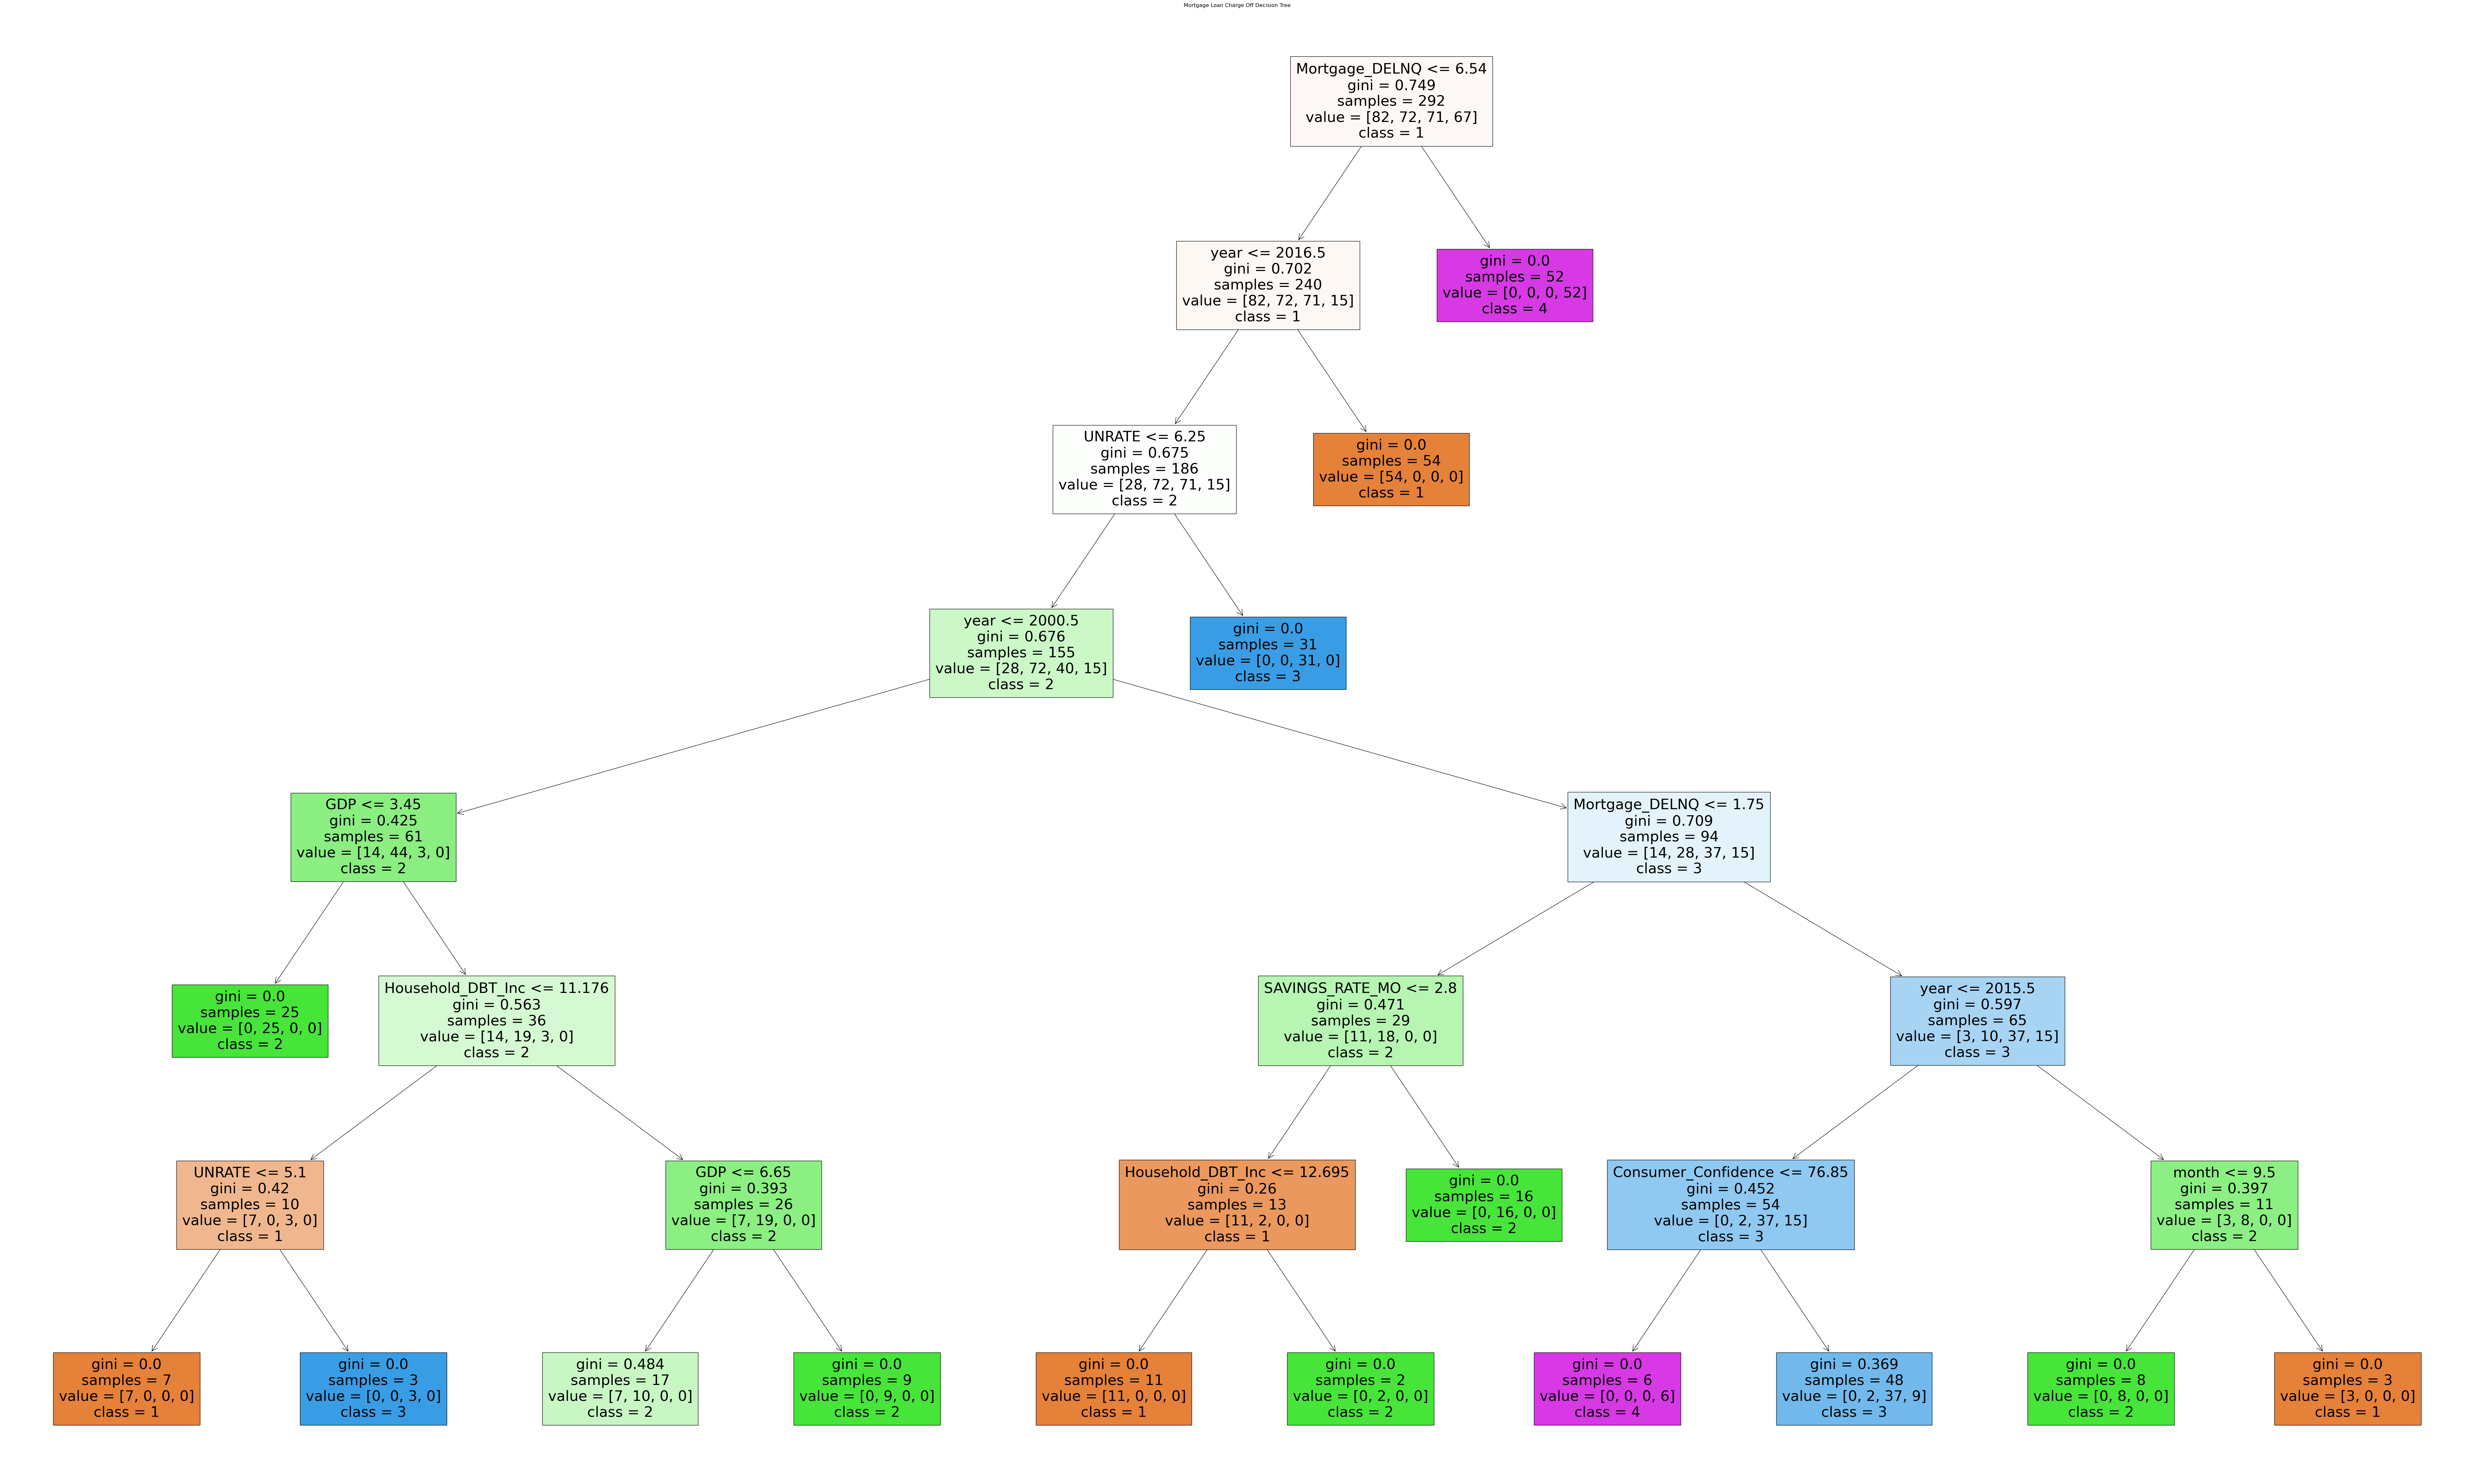

In [13]:
# Visualize the Decision Tree
fig, ax = plt.subplots(figsize=(100,60))
plot_tree(model, filled=True, feature_names=list(X_test.columns), class_names=[str(i) for i in model.classes_])
plt.title("Mortgage Loan Charge Off Decision Tree")
plt.show()

# Mortgage loan Random Forest

In [14]:
model = RandomForestClassifier(n_estimators=1000, max_depth=9, max_samples=100, random_state=1)
model = model.fit(X_train, y_train)
predictions = model.predict(X_test)
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Low", "Actual Medium-Low", "Actual Medium-High", "High"], columns=["Predicted Low", "Predicted Medium-Low", "Predicted Medium-High", "Predicted High"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted Low  Predicted Medium-Low  \
Actual Low                     29                     3   
Actual Medium-Low               0                    18   
Actual Medium-High              0                     2   
High                            0                     0   

                    Predicted Medium-High  Predicted High  
Actual Low                              0               0  
Actual Medium-Low                       0               0  
Actual Medium-High                     19               1  
High                                    0              26

Accuracy Score : 0.9387755102040817
Classification Report
              precision    recall  f1-score   support

           1       1.00      0.91      0.95        32
           2       0.78      1.00      0.88        18
           3       1.00      0.86      0.93        22
           4       0.96      1.00      0.98        26

    accuracy                           0.94        98
   macro avg       0.94      0.94      0.93        98
weighted avg       0.95      0.94      0.94        98



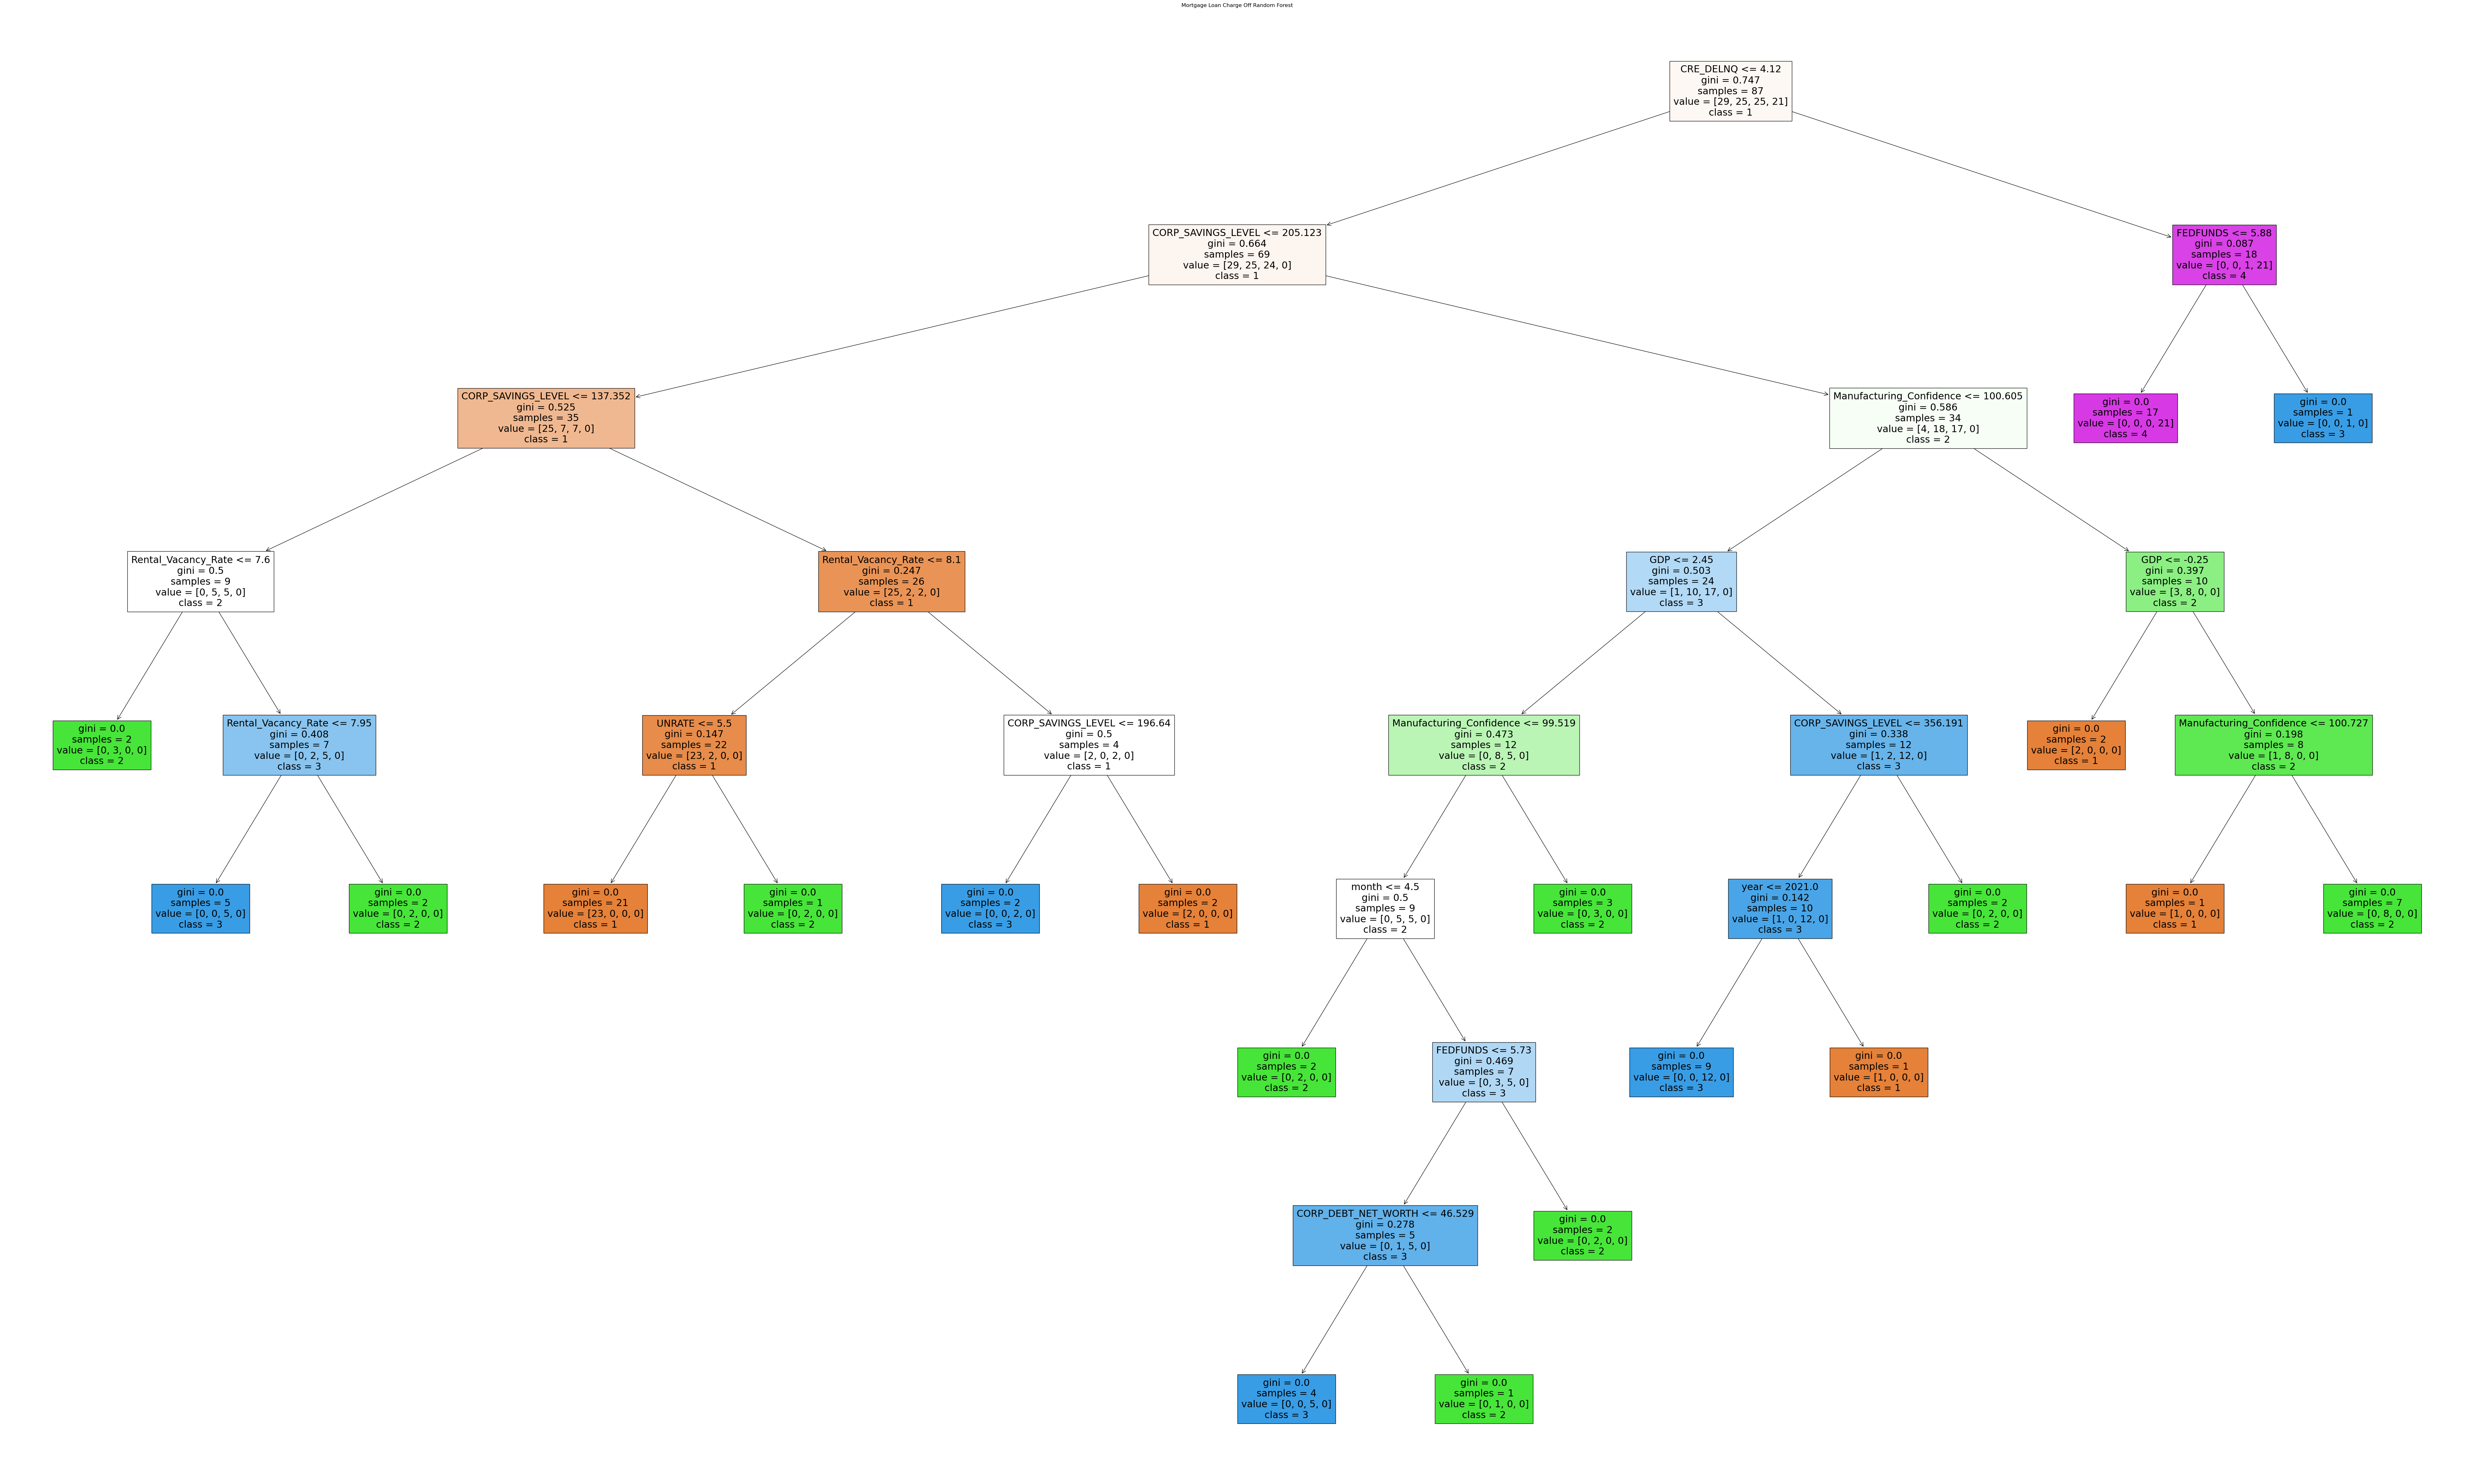

In [33]:
# Visualize the Random Forest
fig, ax = plt.subplots(figsize=(100,60))
plot_tree(model.estimators_[4], filled=True, feature_names=list(X_test.columns), class_names=[str(i) for i in model.classes_])
plt.title("Mortgage Loan Charge Off Random Forest")
plt.show()

# C&I Loan Group

In [34]:
# Create C&I loan dataset
CI_df = main_df[['observation_date', 'C&I_CO', 'C&I_DELNQ', 'GDP', 'CORP_DEBT_NET_WORTH', 'Manufacturing_Confidence', 'FEDFUNDS', 'CORP_SAVINGS_LEVEL', 'UNRATE']]

# Create Year and Month Variables
CI_df["year"] = pd.to_datetime(CI_df["observation_date"]).dt.year
CI_df["month"] = pd.to_datetime(CI_df["observation_date"]).dt.month
# Create copy for bins
CI_bin_df = mort_df.copy()

CI_df.columns

/var/folders/pr/r9s7fv8d3hl7zl078q3rzs_00000gn/T/ipykernel_15629/1548450726.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CI_df["year"] = pd.to_datetime(CI_df["observation_date"]).dt.year
/var/folders/pr/r9s7fv8d3hl7zl078q3rzs_00000gn/T/ipykernel_15629/1548450726.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CI_df["month"] = pd.to_datetime(CI_df["observation_date"]).dt.month


Index(['observation_date', 'C&I_CO', 'C&I_DELNQ', 'GDP', 'CORP_DEBT_NET_WORTH',
       'Manufacturing_Confidence', 'FEDFUNDS', 'CORP_SAVINGS_LEVEL', 'UNRATE',
       'year', 'month'],
      dtype='object')

In [35]:
# Binning the data for classification Question: 
CI_bin_df["C&I_CO_BIN"] = pd.qcut(CI_df['C&I_CO'],4, labels= [1, 2, 3, 4])

# Define the dependent Y variable
y = CI_bin_df["C&I_CO_BIN"]

CI_df = CI_df.drop(columns=['C&I_CO','observation_date'])
CI_df

C&I_DELNQ  GDP  CORP_DEBT_NET_WORTH  Manufacturing_Confidence  FEDFUNDS  \
0         6.29 -1.9            46.132964                 96.951745      6.91   
1         6.29 -1.9            46.132964                 96.972896      6.25   
2         6.29 -1.9            46.132964                 97.223425      6.12   
3         6.41  3.2            46.289579                 97.678049      5.91   
4         6.41  3.2            46.289579                 98.292261      5.78   
..         ...  ...                  ...                       ...       ...   
385       0.98  2.2            40.497128                 98.951152      4.57   
386       0.98  2.2            40.497128                 98.913862      4.65   
387       1.01  2.1            39.659559                 98.904602      4.83   
388       1.01  2.1            39.659559                 98.887364      5.06   
389       1.01  2.1            39.659559                 98.872005      5.08   

     CORP_SAVINGS_LEVEL  UNRATE  year  month  
0                77.964     6.4  1991      1  
1                77.964     6.6  1991      2  
2                77.964     6.8  1991      3  
3                81.294     6.7  1991      4  
4                81.294     6.9  1991      5  
..                  ...     ...   ...    ...  
385             263.194     3.6  2023      2  
386             263.194     3.5  2023      3  
387             367.036     3.4  2023      4  
388             367.036     3.7  2023      5  
389             367.036     3.6  2023      6  

[390 rows x 9 columns]

# C&I Decision Tree

In [36]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(CI_df, y, random_state=78)
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier(max_depth=7, random_state=1, min_samples_leaf=1)
# Fitting the model
model = model.fit(X_train, y_train)
# Making predictions using the testing data
predictions = model.predict(X_test)

In [37]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Low", "Actual Medium-Low", "Actual Medium-High", "High"], columns=["Predicted Low", "Predicted Medium-Low", "Predicted Medium-High", "Predicted High"]
)
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted Low  Predicted Medium-Low  \
Actual Low                     24                     1   
Actual Medium-Low               6                    14   
Actual Medium-High              0                     5   
High                            0                     0   

                    Predicted Medium-High  Predicted High  
Actual Low                              0               0  
Actual Medium-Low                       3               0  
Actual Medium-High                     19               0  
High                                    1              25

Accuracy Score : 0.8367346938775511
Classification Report
              precision    recall  f1-score   support

           1       0.80      0.96      0.87        25
           2       0.70      0.61      0.65        23
           3       0.83      0.79      0.81        24
           4       1.00      0.96      0.98        26

    accuracy                           0.84        98
   macro avg       0.83      0.83      0.83        98
weighted avg       0.84      0.84      0.83        98



In [38]:
# Print Importance of the Features
features = zip(model.feature_names_in_,model.feature_importances_)
for f in features:
    print(f)

('C&I_DELNQ', 0.4880540076334072)
('GDP', 0.0565497332443397)
('CORP_DEBT_NET_WORTH', 0.14804418900259483)
('Manufacturing_Confidence', 0.0988391423763384)
('FEDFUNDS', 0.025148583204885902)
('CORP_SAVINGS_LEVEL', 0.11603655696204995)
('UNRATE', 0.0)
('year', 0.06732778757638405)
('month', 0.0)


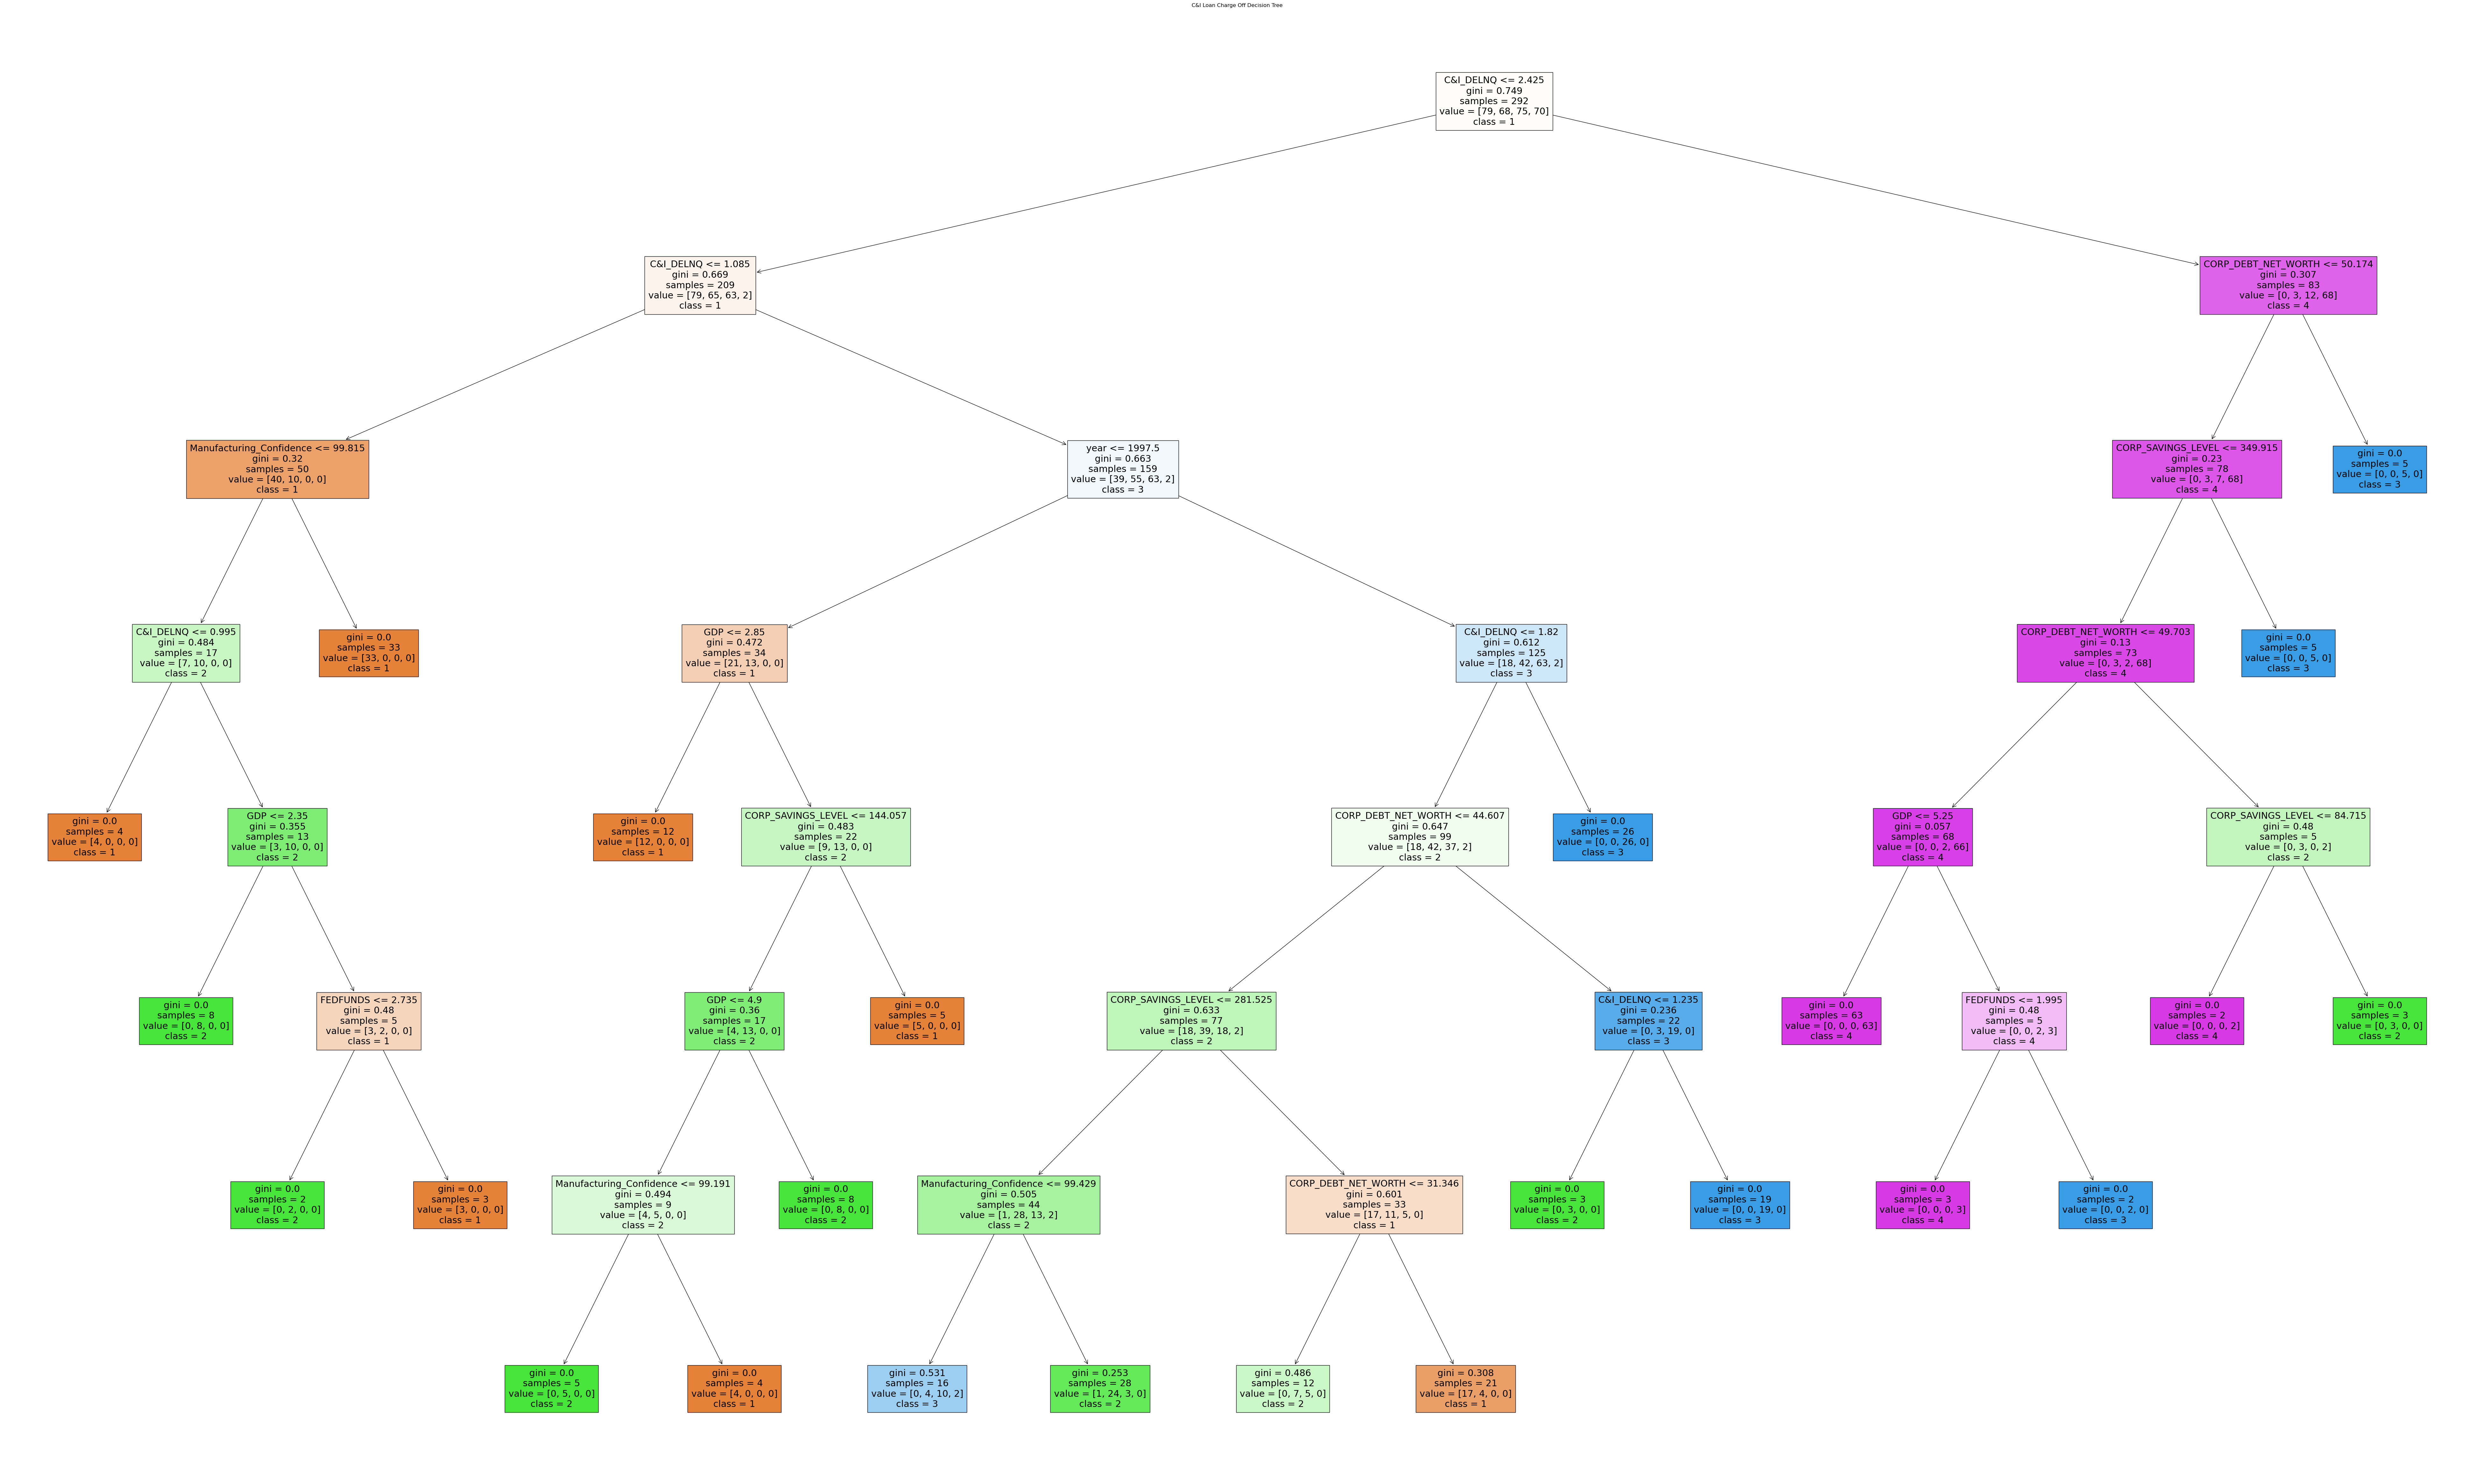

In [39]:
# Visualize the Decision Tree
fig, ax = plt.subplots(figsize=(100,60))
plot_tree(model, filled=True, feature_names=list(X_test.columns), class_names=[str(i) for i in model.classes_])
plt.title("C&I Loan Charge Off Decision Tree")
plt.show()

# C&I Loan Random Forest

In [40]:
model = RandomForestClassifier(n_estimators=1000, max_depth=9, max_samples=100, random_state=1)
model = model.fit(X_train, y_train)
predictions = model.predict(X_test)
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Low", "Actual Medium-Low", "Actual Medium-High", "High"], columns=["Predicted Low", "Predicted Medium-Low", "Predicted Medium-High", "Predicted High"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted Low  Predicted Medium-Low  \
Actual Low                     24                     1   
Actual Medium-Low               4                    18   
Actual Medium-High              0                     1   
High                            0                     0   

                    Predicted Medium-High  Predicted High  
Actual Low                              0               0  
Actual Medium-Low                       1               0  
Actual Medium-High                     23               0  
High                                    0              26

Accuracy Score : 0.9285714285714286
Classification Report
              precision    recall  f1-score   support

           1       0.86      0.96      0.91        25
           2       0.90      0.78      0.84        23
           3       0.96      0.96      0.96        24
           4       1.00      1.00      1.00        26

    accuracy                           0.93        98
   macro avg       0.93      0.93      0.93        98
weighted avg       0.93      0.93      0.93        98



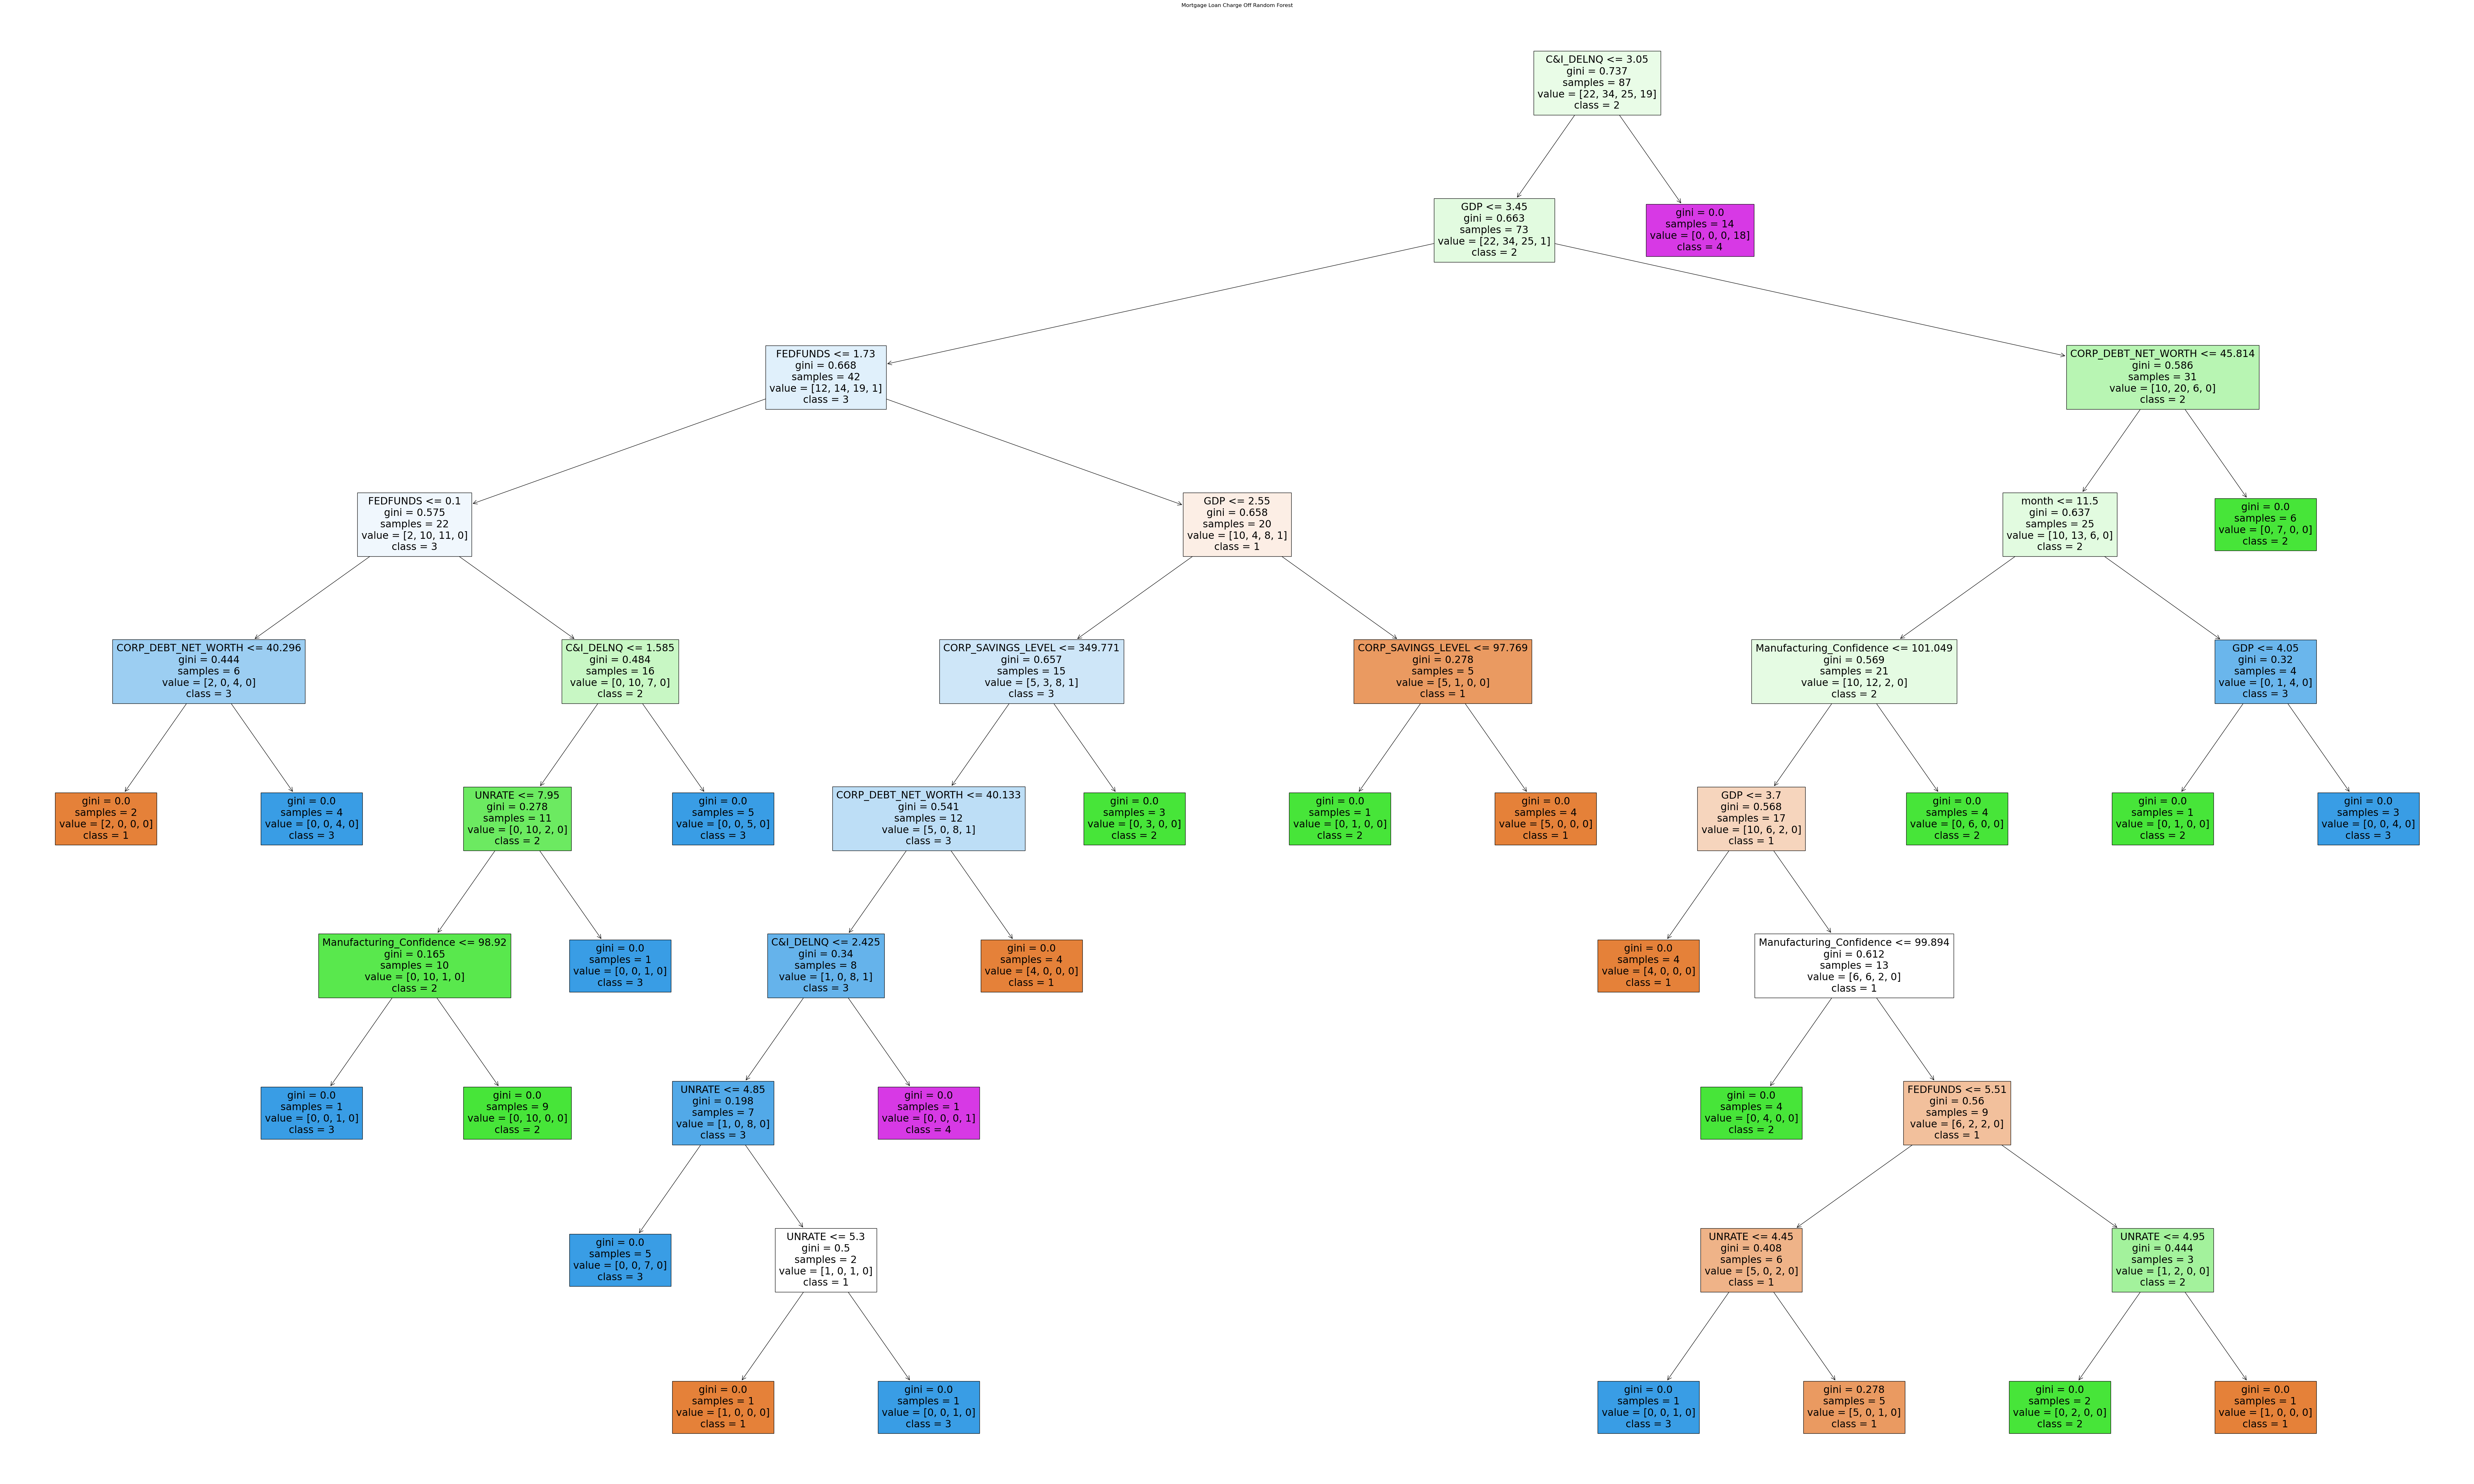

In [41]:
# Visualize the Random Forest
fig, ax = plt.subplots(figsize=(100,60))
plot_tree(model.estimators_[4], filled=True, feature_names=list(X_test.columns), class_names=[str(i) for i in model.classes_])
plt.title("Mortgage Loan Charge Off Random Forest")
plt.show()

# CRE Loan Group

In [42]:
# Create CRE loan dataset
CRE_df = main_df[['observation_date', 'CRE_CO', 'CRE_DELNQ', 'Rental_Vacancy_Rate', 'GDP', 'CORP_DEBT_NET_WORTH', 'Manufacturing_Confidence', 'FEDFUNDS', 'CORP_SAVINGS_LEVEL', 'UNRATE']]


In [43]:
# Create Year and Month Variables
CRE_df["year"] = pd.to_datetime(CRE_df["observation_date"]).dt.year
CRE_df["month"] = pd.to_datetime(CRE_df["observation_date"]).dt.month
# Create copy for bins
CRE_bin_df = mort_df.copy()

CRE_df.columns

/var/folders/pr/r9s7fv8d3hl7zl078q3rzs_00000gn/T/ipykernel_15629/2324485914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CRE_df["year"] = pd.to_datetime(CRE_df["observation_date"]).dt.year
/var/folders/pr/r9s7fv8d3hl7zl078q3rzs_00000gn/T/ipykernel_15629/2324485914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CRE_df["month"] = pd.to_datetime(CRE_df["observation_date"]).dt.month


Index(['observation_date', 'CRE_CO', 'CRE_DELNQ', 'Rental_Vacancy_Rate', 'GDP',
       'CORP_DEBT_NET_WORTH', 'Manufacturing_Confidence', 'FEDFUNDS',
       'CORP_SAVINGS_LEVEL', 'UNRATE', 'year', 'month'],
      dtype='object')

In [44]:
# Binning the data for classification Question: 
CRE_bin_df["CRE_CO_BIN"] = pd.qcut(CRE_df['CRE_CO'],4, labels= [1, 2, 3, 4])

# Define the dependent Y variable
y = CRE_bin_df["CRE_CO_BIN"]

CRE_df = CRE_df.drop(columns=['CRE_CO','observation_date'])
CRE_df

CRE_DELNQ  Rental_Vacancy_Rate  GDP  CORP_DEBT_NET_WORTH  \
0        12.08                  7.5 -1.9            46.132964   
1        12.08                  7.5 -1.9            46.132964   
2        12.08                  7.5 -1.9            46.132964   
3        11.82                  7.3  3.2            46.289579   
4        11.82                  7.3  3.2            46.289579   
..         ...                  ...  ...                  ...   
385       0.77                  6.4  2.2            40.497128   
386       0.77                  6.4  2.2            40.497128   
387       0.84                  6.3  2.1            39.659559   
388       0.84                  6.3  2.1            39.659559   
389       0.84                  6.3  2.1            39.659559   

     Manufacturing_Confidence  FEDFUNDS  CORP_SAVINGS_LEVEL  UNRATE  year  \
0                   96.951745      6.91              77.964     6.4  1991   
1                   96.972896      6.25              77.964     6.6  1991   
2                   97.223425      6.12              77.964     6.8  1991   
3                   97.678049      5.91              81.294     6.7  1991   
4                   98.292261      5.78              81.294     6.9  1991   
..                        ...       ...                 ...     ...   ...   
385                 98.951152      4.57             263.194     3.6  2023   
386                 98.913862      4.65             263.194     3.5  2023   
387                 98.904602      4.83             367.036     3.4  2023   
388                 98.887364      5.06             367.036     3.7  2023   
389                 98.872005      5.08             367.036     3.6  2023   

     month  
0        1  
1        2  
2        3  
3        4  
4        5  
..     ...  
385      2  
386      3  
387      4  
388      5  
389      6  

[390 rows x 10 columns]

# CRE Loan Decision Tree

In [45]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(CRE_df, y, random_state=78)
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier(max_depth=7, random_state=1, min_samples_leaf=1)
# Fitting the model
model = model.fit(X_train, y_train)
# Making predictions using the testing data
predictions = model.predict(X_test)

In [46]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Low", "Actual Medium-Low", "Actual Medium-High", "High"], columns=["Predicted Low", "Predicted Medium-Low", "Predicted Medium-High", "Predicted High"]
)
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted Low  Predicted Medium-Low  \
Actual Low                     21                     4   
Actual Medium-Low               1                    21   
Actual Medium-High              0                     4   
High                            0                     1   

                    Predicted Medium-High  Predicted High  
Actual Low                              1               0  
Actual Medium-Low                       0               0  
Actual Medium-High                     18               0  
High                                    0              27

Accuracy Score : 0.8877551020408163
Classification Report
              precision    recall  f1-score   support

           1       0.95      0.81      0.88        26
           2       0.70      0.95      0.81        22
           3       0.95      0.82      0.88        22
           4       1.00      0.96      0.98        28

    accuracy                           0.89        98
   macro avg       0.90      0.89      0.89        98
weighted avg       0.91      0.89      0.89        98



In [47]:
# Print Importance of the Features
features = zip(model.feature_names_in_,model.feature_importances_)
for f in features:
    print(f)

('CRE_DELNQ', 0.4141174648284926)
('Rental_Vacancy_Rate', 0.0723267347938468)
('GDP', 0.05541961966887676)
('CORP_DEBT_NET_WORTH', 0.12302247905420502)
('Manufacturing_Confidence', 0.06057471841990428)
('FEDFUNDS', 0.01121799971283659)
('CORP_SAVINGS_LEVEL', 0.05590245270092328)
('UNRATE', 0.14756772502418047)
('year', 0.05417669317249674)
('month', 0.005674112624237417)


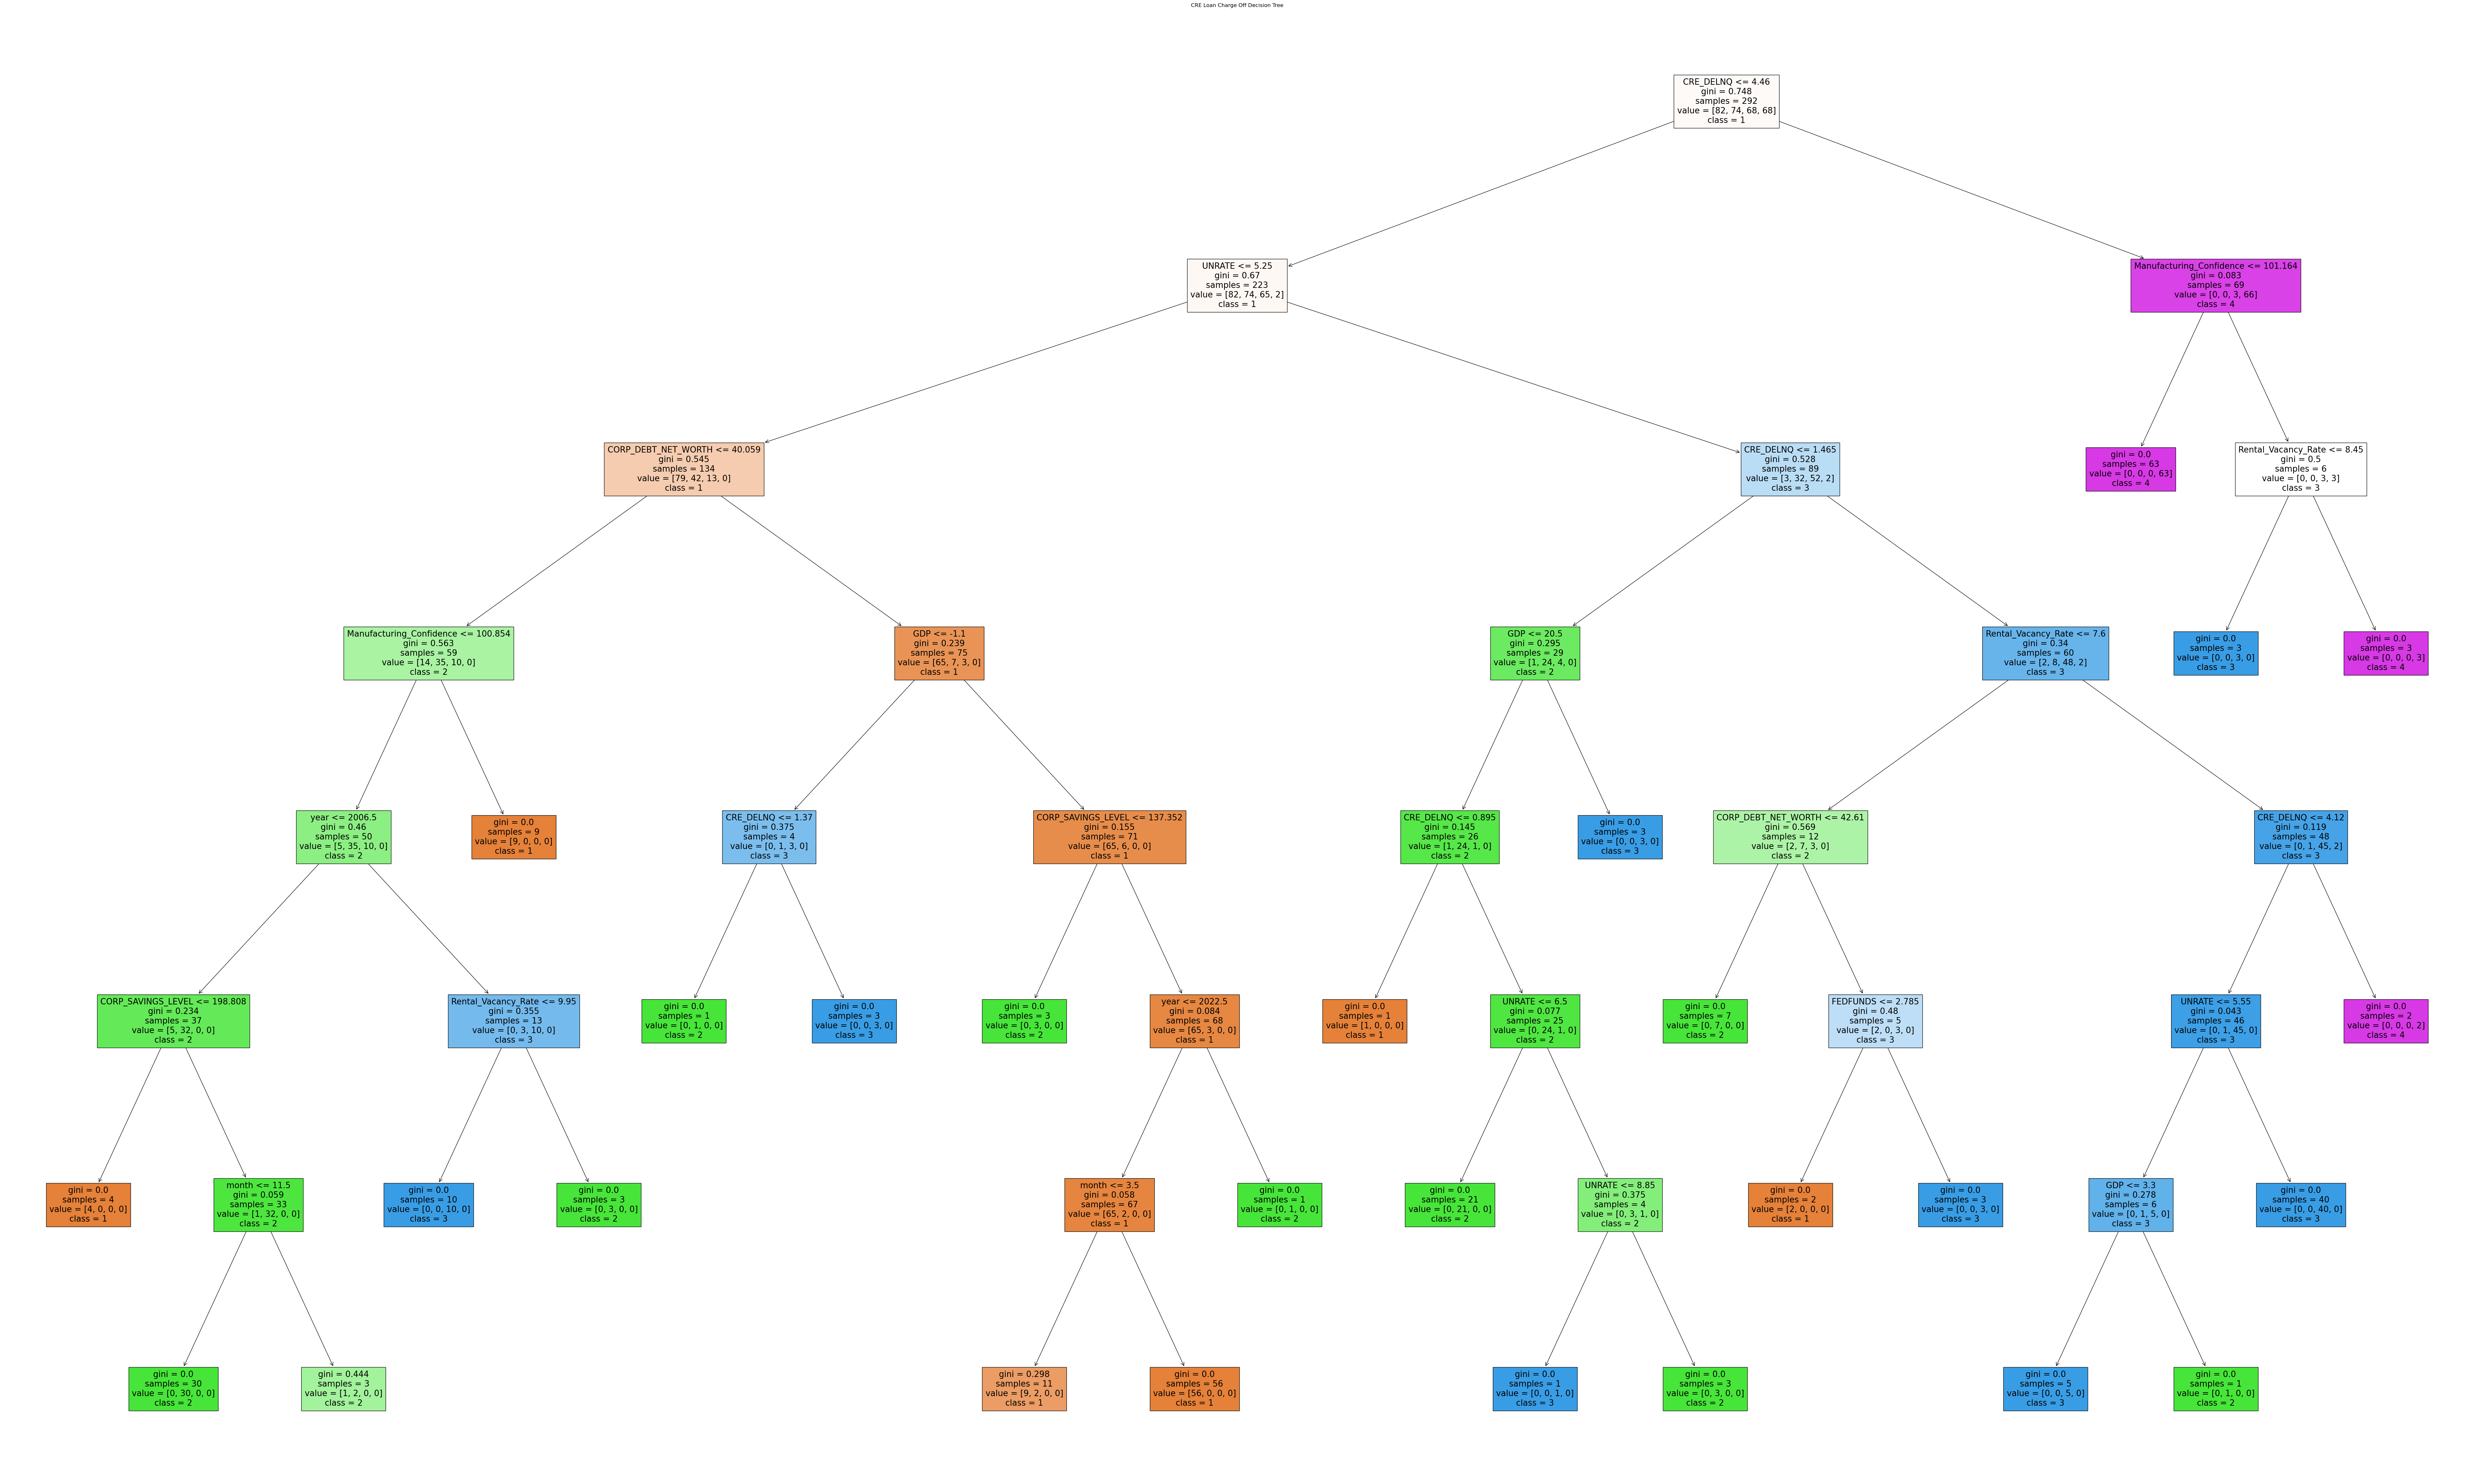

In [48]:
# Visualize the Decision Tree
fig, ax = plt.subplots(figsize=(100,60))
plot_tree(model, filled=True, feature_names=list(X_test.columns), class_names=[str(i) for i in model.classes_])
plt.title("CRE Loan Charge Off Decision Tree")
plt.show()

# CRE Loan Random Forest

In [49]:
model = RandomForestClassifier(n_estimators=1000, max_depth=9, max_samples=100, random_state=1)
model = model.fit(X_train, y_train)
predictions = model.predict(X_test)
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Low", "Actual Medium-Low", "Actual Medium-High", "High"], columns=["Predicted Low", "Predicted Medium-Low", "Predicted Medium-High", "Predicted High"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted Low  Predicted Medium-Low  \
Actual Low                     22                     4   
Actual Medium-Low               2                    20   
Actual Medium-High              0                     0   
High                            0                     0   

                    Predicted Medium-High  Predicted High  
Actual Low                              0               0  
Actual Medium-Low                       0               0  
Actual Medium-High                     22               0  
High                                    0              28

Accuracy Score : 0.9387755102040817
Classification Report
              precision    recall  f1-score   support

           1       0.92      0.85      0.88        26
           2       0.83      0.91      0.87        22
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        28

    accuracy                           0.94        98
   macro avg       0.94      0.94      0.94        98
weighted avg       0.94      0.94      0.94        98



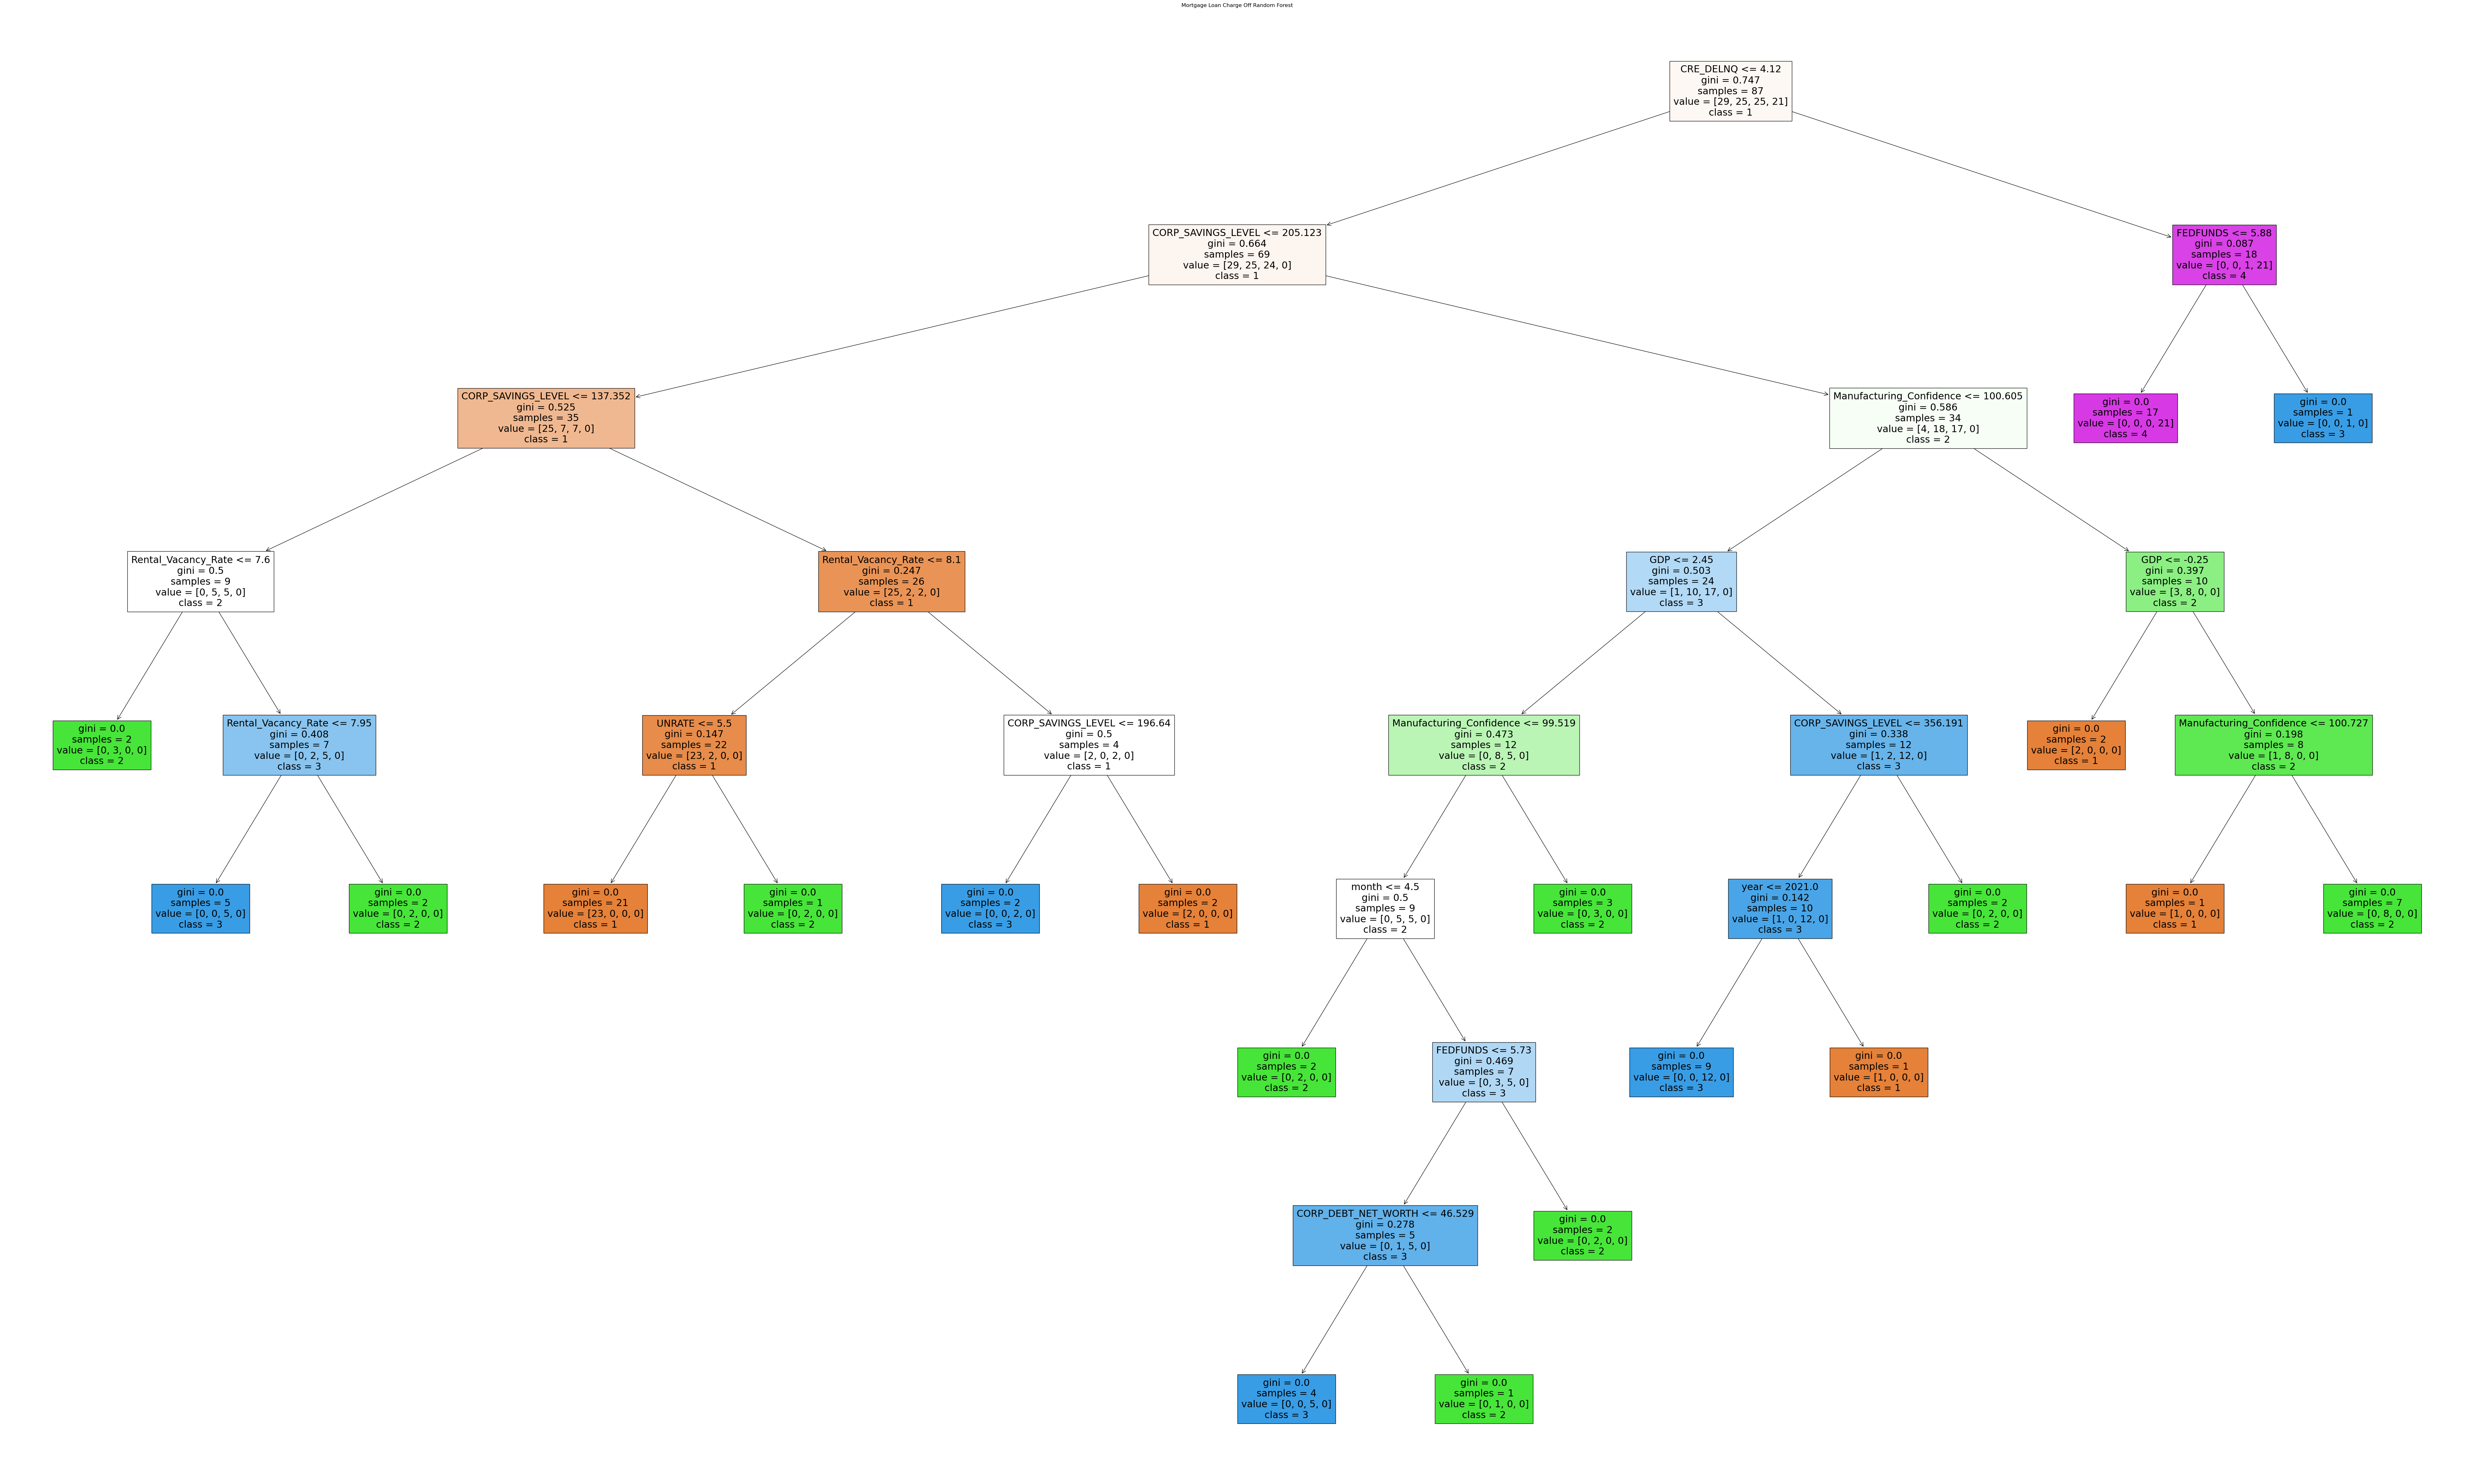

In [50]:
# Visualize the Random Forest
fig, ax = plt.subplots(figsize=(100,60))
plot_tree(model.estimators_[4], filled=True, feature_names=list(X_test.columns), class_names=[str(i) for i in model.classes_])
plt.title("Mortgage Loan Charge Off Random Forest")
plt.show()